In [32]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
plt.style.use('default')

In [20]:
CSV_01 = '../data/creditcard.csv'
RANDOM_STATE = 0
ALPHA = 1.0  # Ridge Lambda regularization parameter

In [14]:
# Read imbalanced original data
df = pd.read_csv(CSV_01)
print(df.shape)

# Organize columns
df = df.drop(columns=['Time', 'Amount'])
response = df.pop('Class')
df.insert(0, 'Class', response)
print(df.shape)

# Make it balanced
df = shuffle(df, random_state=RANDOM_STATE)
df_1 = df.loc[df['Class'] == 1]
df_0 = df.loc[df['Class'] == 0][:len(df_1)]
df = pd.concat([df_1, df_0])
df = shuffle(df, random_state=RANDOM_STATE)
print(df.shape)

(284807, 31)
(284807, 29)
(984, 29)


In [15]:
df.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
74794,1,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,-0.049233,-0.153131,-0.814310,-1.894796,-0.831483,1.387289,1.188907,0.536817,-0.051403,-1.231386,-4.128186,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285
264755,0,0.285994,-3.500172,0.120214,2.870073,-2.219233,1.735747,-0.809120,0.517737,1.304203,0.572238,-0.843588,-0.095421,-1.652901,-0.781826,-2.591612,1.292730,-0.278208,0.348355,-0.443393,1.347581,0.495849,-0.060820,-0.444735,-0.340144,-1.153573,2.258126,-0.248557,0.067937
223572,1,-2.729482,3.312495,-4.242710,5.036985,-0.376561,-1.532462,-3.449159,1.856839,-3.623334,-5.653638,3.942316,-5.883724,-1.347814,-9.266120,-2.459556,-2.205644,-5.709087,-1.113937,-1.556530,0.164288,0.727415,-0.301432,-0.502433,-0.462309,0.510683,0.046665,0.514646,0.140999
119634,0,0.364647,-1.868803,0.195291,0.395567,-1.140283,0.370634,-0.015770,-0.027628,1.157162,-0.683766,-1.618061,0.478853,0.640767,-0.588908,-0.213943,0.216853,-0.230232,-0.263339,0.690443,0.948612,-0.007493,-0.815611,-0.467571,-0.500501,0.109927,0.952522,-0.122180,0.087820
82678,0,1.277862,-1.218097,0.436517,-1.443919,-0.943716,0.816429,-1.234908,0.338397,-1.845883,1.249644,0.727192,-0.541243,0.093744,-0.108782,1.664313,-1.748267,1.848211,-2.056222,-1.922357,-0.460539,-0.066430,0.302245,0.191320,-0.666031,0.013571,-0.098652,0.096963,0.011778


In [18]:
c = Counter(df['Class'])
print(c)

Counter({1: 492, 0: 492})


In [35]:
model = Ridge(alpha=ALPHA)

df_tmp = df.copy()
y = df_tmp.pop('Class')
X = df_tmp
features = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

model.fit(X, y)

ridge_coef = model.coef_

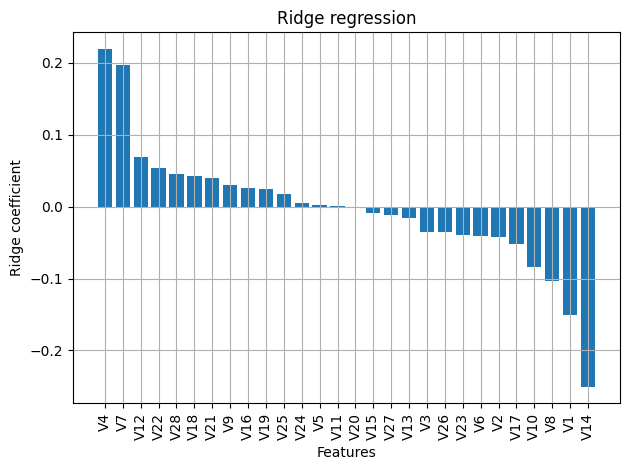

In [39]:
zipped_lists = zip(ridge_coef, features)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
ridge_coef, features = [list(tuple) for tuple in tuples]

plt.bar(features, ridge_coef)
plt.title('Ridge regression')
plt.xlabel('Features')
plt.ylabel('Ridge coefficient')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

In [50]:
u, s, vh = np.linalg.svd(X)
print(f'X: {X.shape}, u: {u.shape}, s: {s.shape}, vh: {vh.shape}')

X: (984, 28), u: (984, 984), s: (28,), vh: (28, 28)


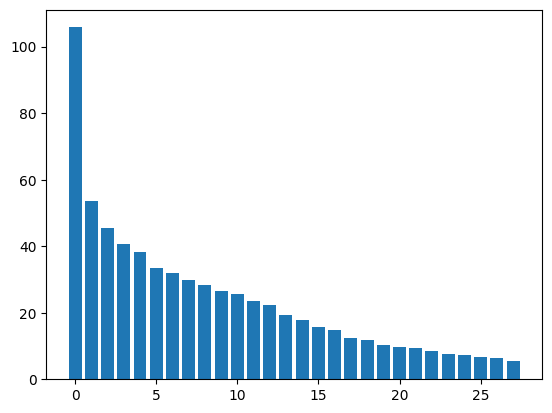

In [55]:
plt.bar(range(len(s)), s)
plt.show()